In [1]:
!pip install prophet


In [2]:
#import needed libs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from prophet import Prophet


In [3]:
#data_set.  Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [4]:

df_sorted = df.sort_values("Total_Amt")
df_sorted.head()

Invoice_id  Cust_id Product_Sub_category Product_Category  Qty  \
Txn_date                                                                      
2017-04-29   6409679426   267504                 Kids         Footwear    1   
2018-08-18  41885435954   272238                 Kids            Books    1   
2018-01-16  20826996132   271969                 Kids         Clothing    1   
2018-04-07  77308601183   268879                 Mens         Clothing    1   
2018-12-27  16380694071   268284                 Mens             Bags    1   

            Rate    Tax  Total_Amt        Store_type  
Txn_date                                              
2017-04-29    70  7.350     77.350          TeleShop  
2018-08-18    70  7.350     77.350          TeleShop  
2018-01-16    70  7.350     77.350            e-Shop  
2018-04-07    71  7.455     78.455  Brick and Mortar  
2018-12-27    71  7.455     78.455            e-Shop

In [5]:
#resample
df_daily = df.resample('D').sum().reset_index()


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_64570/214196941.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum().reset_index()


In [6]:
df_daily.head()

Txn_date     Invoice_id  Cust_id  Qty   Rate       Tax  Total_Amt
0 2016-01-02  1107788615825  6220887   72  17305  5713.155  60124.155
1 2016-01-03   742164348049  3252878   40   7996  3108.315  32711.315
2 2016-01-04  1146571949749  6213473   75  18683  6595.155  69406.155
3 2016-01-05   879331792460  5955886   69  17788  5741.820  60425.820
4 2016-01-06   788980970651  4582807   50  14008  3974.775  41829.775

In [7]:
#checking for negative and zero values:
zero = (df_daily['Total_Amt'] == 0).any()
negatives = (df_daily['Total_Amt'] < 0).any()

print(zero)
print(negatives)

True
False


In [8]:
#rename columns
df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})


In [48]:
# run this if holidays needed to be included!
m = Prophet(daily_seasonality=False, changepoint_prior_scale=0.1)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.add_country_holidays(country_name='US')
m.fit(df_prophet)

12:18:01 - cmdstanpy - INFO - Chain [1] start processing
12:18:01 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
#Only! daily seasonality and change point



m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.1)

# adding custom weekly seasonality
m.add_seasonality(name='weekly', period=7, fourier_order=3)

# fit the model
m.fit(df_prophet)

12:20:53 - cmdstanpy - INFO - Chain [1] start processing
12:20:53 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
#creating df to hold prediction
future = m.make_future_dataframe(periods=365) #  next year


In [82]:
#Prediction
forecast = m.predict(future)


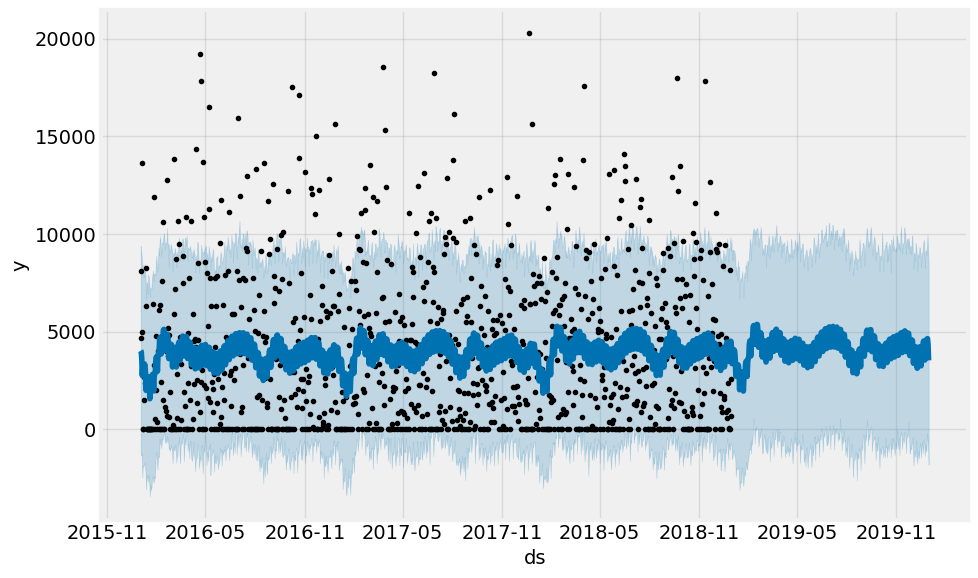

In [83]:
#plot the forecast
fig1 = m.plot(forecast)


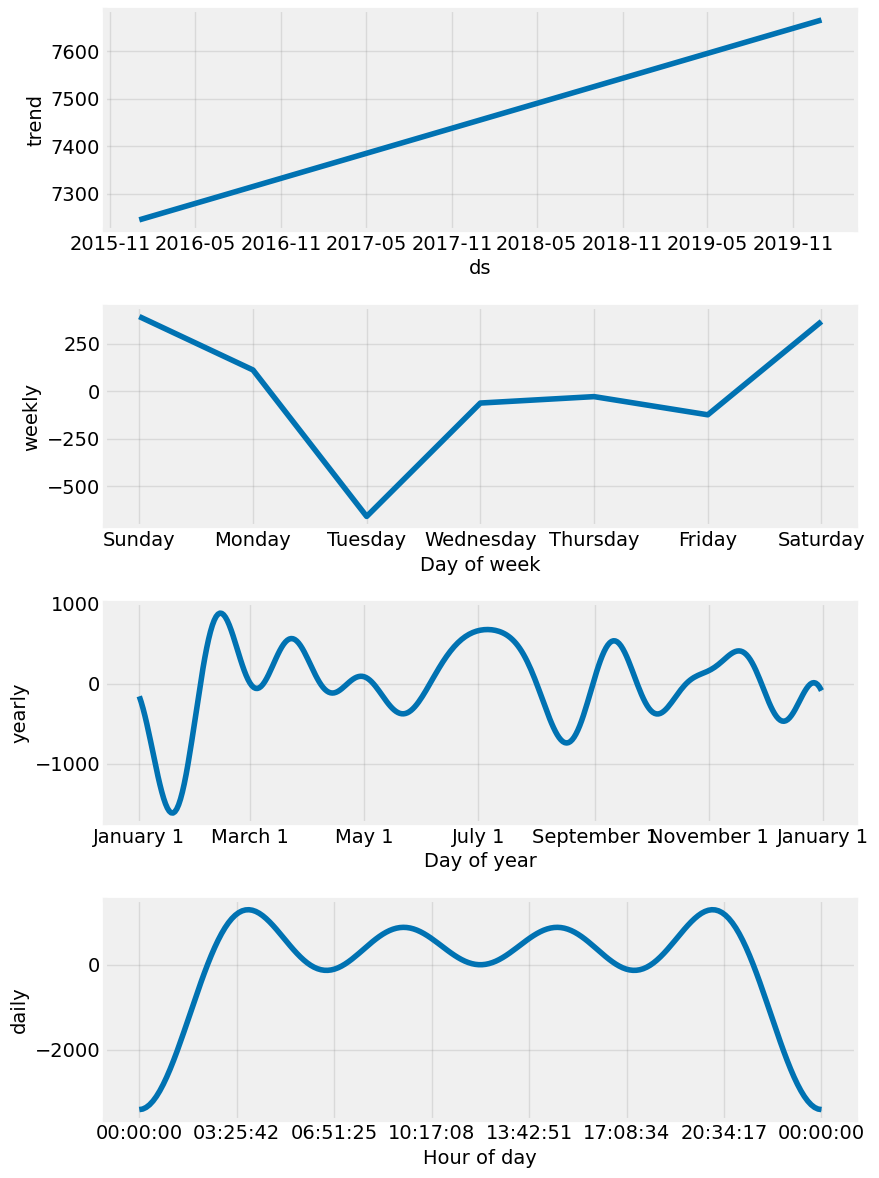

In [84]:
fig2 = m.plot_components(forecast)


In [85]:
# Initialize a dictionary to store the models
models = {}

In [86]:
# categories
unique_categories = df['Product_Category'].unique()
unique_categories

array(['Electronics', 'Books', 'Clothing', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [87]:
for category in unique_categories:
    # Filter the data
    df_filtered = df[df['Product_Category'] == category]
    df_daily = df_filtered.resample('D').sum().reset_index()
    
    df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})

    # Initialize and fit the model
    m = Prophet(daily_seasonality=True)
    m.fit(df_prophet)

    # Store the model
    models[category] = m

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_64570/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
12:20:59 - cmdstanpy - INFO - Chain [1] start processing
12:20:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_64570/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
12:20:59 - cmdstanpy - INFO - Chain [1] start processing
12:20:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_

In [88]:
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2016-01-02  7244.858235 -1213.630162  9401.680367  7244.858235   
1    2016-01-03  7245.146417 -1343.131929  9059.731417  7245.146417   
2    2016-01-04  7245.434598 -1243.250214  8802.585645  7245.434598   
3    2016-01-05  7245.722780 -2466.093105  7929.985886  7245.722780   
4    2016-01-06  7246.010962 -1844.393146  8445.968676  7246.010962   
...         ...          ...          ...          ...          ...   
1455 2019-12-27  7664.160559 -1037.426326  8931.729446  7664.160117   
1456 2019-12-28  7664.448738  -201.623614  9440.170446  7664.448294   
1457 2019-12-29  7664.736917  -549.765409  9968.009718  7664.736470   
1458 2019-12-30  7665.025096  -735.530839  9259.233531  7665.024647   
1459 2019-12-31  7665.313275 -1808.473540  8486.578273  7665.312824   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     7244.858235    -3218.677154          -3218.677154          -3218.677154   
1     7245.146417    -3265.581797          -3265.581797          -3265.581797   
2     7245.434598    -3629.849612          -3629.849612          -3629.849612   
3     7245.722780    -4493.187106          -4493.187106          -4493.187106   
4     7246.010962    -3997.031865          -3997.031865          -3997.031865   
...           ...             ...                   ...                   ...   
1455  7664.161018    -3523.539858          -3523.539858          -3523.539858   
1456  7664.449200    -3033.735922          -3033.735922          -3033.735922   
1457  7664.737381    -3020.306210          -3020.306210          -3020.306210   
1458  7665.025563    -3325.815777          -3325.815777          -3325.815777   
1459  7665.313745    -4133.479469          -4133.479469          -4133.479469   

            daily  ...      weekly  weekly_lower  weekly_upper      yearly  \
0    -3411.007334  ...  367.082920    367.082920    367.082920 -174.752739   
1    -3411.007334  ...  393.043128    393.043128    393.043128 -247.617591   
2    -3411.007334  ...  112.150336    112.150336    112.150336 -330.992613   
3    -3411.007334  ... -658.517291   -658.517291   -658.517291 -423.662481   
4    -3411.007334  ...  -61.880863    -61.880863    -61.880863 -524.143667   
...           ...  ...         ...           ...           ...         ...   
1455 -3411.007334  ... -123.741531   -123.741531   -123.741531   11.209008   
1456 -3411.007334  ...  367.082920    367.082920    367.082920   10.188493   
1457 -3411.007334  ...  393.043128    393.043128    393.043128   -2.342004   
1458 -3411.007334  ...  112.150336    112.150336    112.150336  -26.958779   
1459 -3411.007334  ... -658.517291   -658.517291   -658.517291  -63.954843   

      yearly_lower  yearly_upper  multiplicative_terms  \
0      -174.752739   -174.752739                   0.0   
1      -247.617591   -247.617591                   0.0   
2      -330.992613   -330.992613                   0.0   
3      -423.662481   -423.662481                   0.0   
4      -524.143667   -524.143667                   0.0   
...            ...           ...                   ...   
1455     11.209008     11.209008                   0.0   
1456     10.188493     10.188493                   0.0   
1457     -2.342004     -2.342004                   0.0   
1458    -26.958779    -26.958779                   0.0   
1459    -63.954843    -63.954843                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                            0.0                         0.0  4026.181081  
1                            0.0                         0.0  3979.564620  
2                            0.0                         0.0  3615.584987  
3                            0.0                         0.0  2752.535674  
4                            0.0                         0.0  3248.979096  
...                          ...                         ...          ...  
1455                 

In [89]:
# Initialize a dictionary to store the forecasts
forecasts = {}

for category, model in models.items():
    # Create future dataframe
    future = model.make_future_dataframe(periods=365)

    # Predict
    forecast = model.predict(future)

    # Store the forecast
    forecasts[category] = forecast


Forecast for category: Electronics


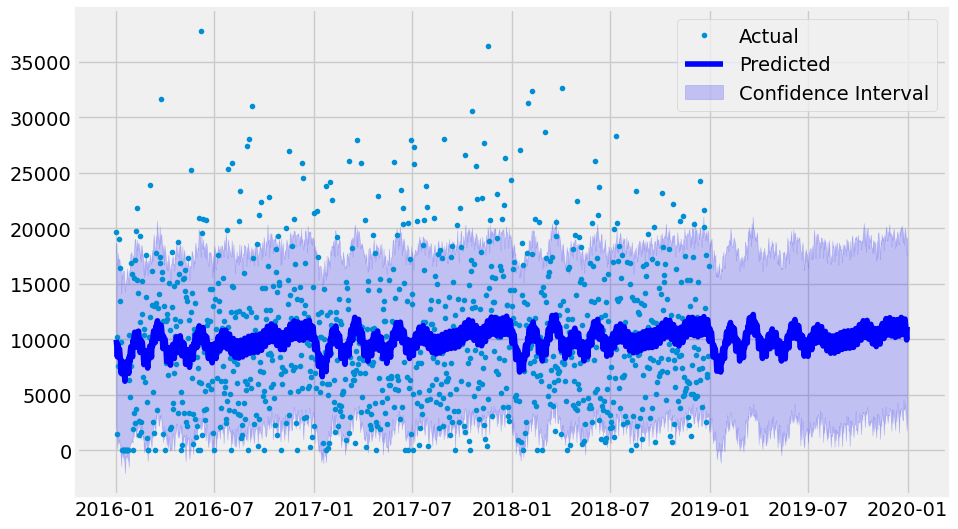

Forecast for category: Books


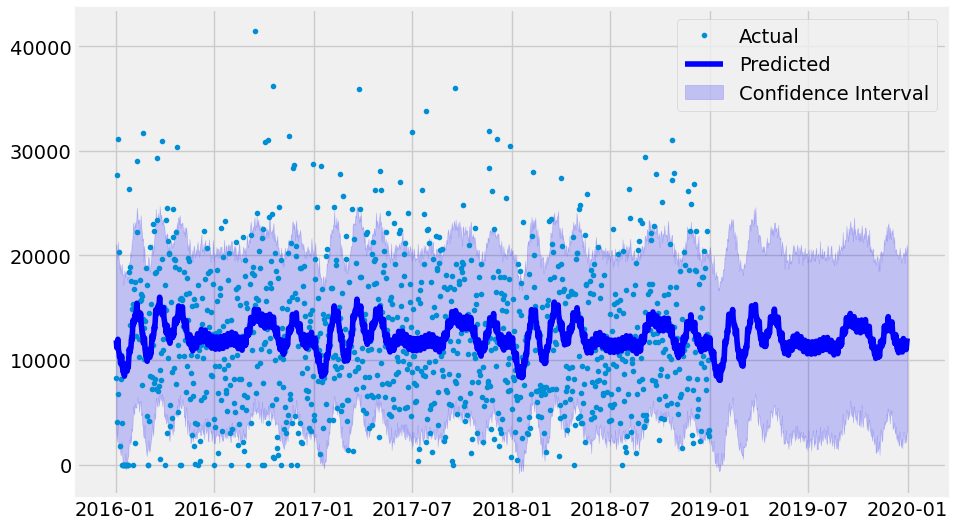

Forecast for category: Clothing


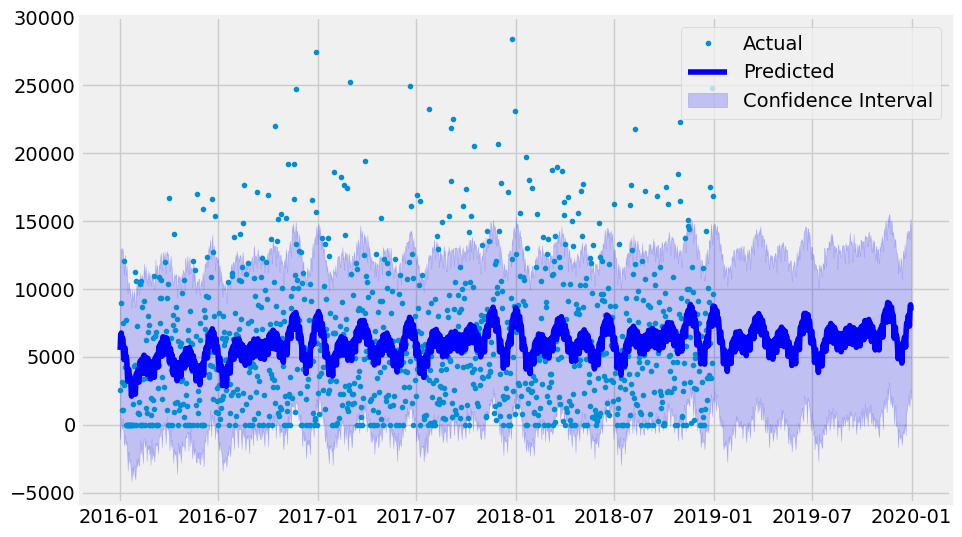

Forecast for category: Home and kitchen


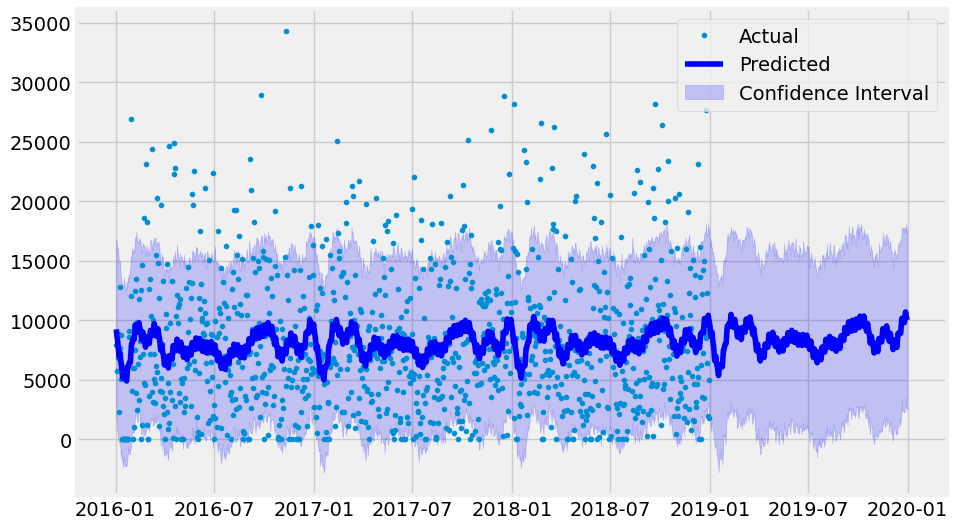

Forecast for category: Footwear


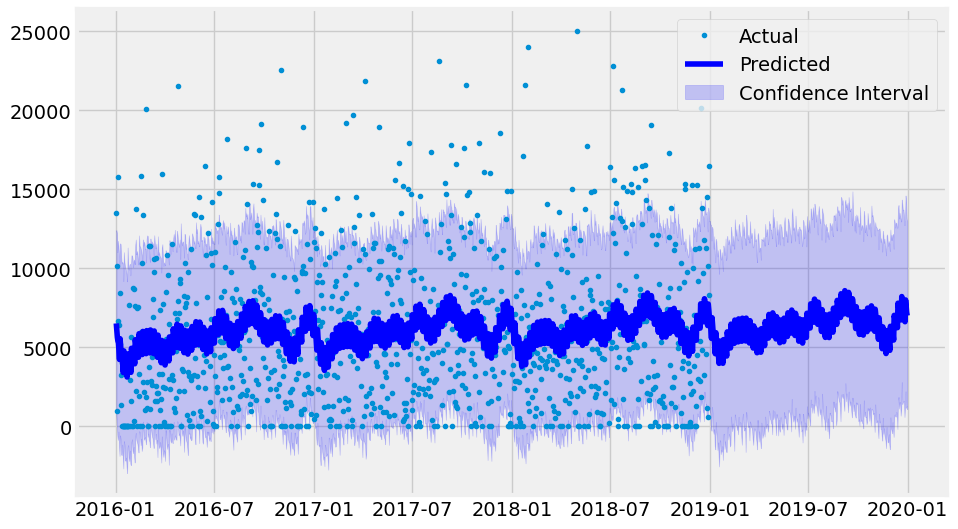

Forecast for category: Bags


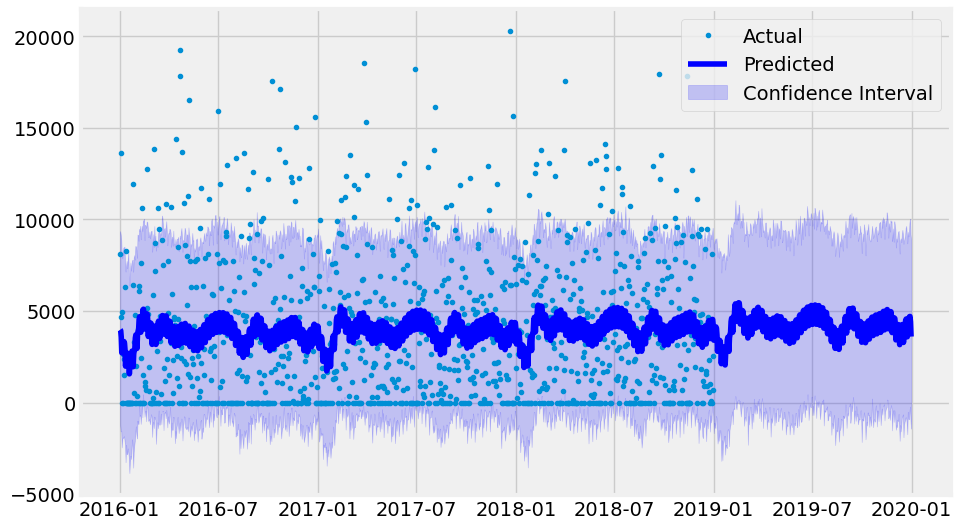

In [90]:
#Forecast for each category:

for category, forecast in forecasts.items():
    print(f"Forecast for category: {category}")
    model = models[category]
    
    fig = plt.figure(facecolor='w', figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(model.history['ds'], model.history['y'], '.', label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='blue', label='Predicted')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')
    ax.legend(loc='best')
    plt.show()  


In [91]:
forecast

ds        trend   yhat_lower    yhat_upper  trend_lower  \
0    2016-01-02  7239.381723 -1227.654918   9358.678388  7239.381723   
1    2016-01-03  7239.757264 -1571.965697   9182.249319  7239.757264   
2    2016-01-04  7240.132805 -1540.538224   8877.628608  7240.132805   
3    2016-01-05  7240.508346 -2447.417488   7990.286019  7240.508346   
4    2016-01-06  7240.883887 -1964.828155   7901.125308  7240.883887   
...         ...          ...          ...           ...          ...   
1455 2019-12-27  7785.725953  -912.418104   9177.388687  7785.723495   
1456 2019-12-28  7786.101438  -569.698723   9820.927957  7786.098969   
1457 2019-12-29  7786.476922  -219.087520  10033.188090  7786.474440   
1458 2019-12-30  7786.852407 -1009.233138   9182.801893  7786.849910   
1459 2019-12-31  7787.227892 -1421.410119   8902.644696  7787.225383   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     7239.381723    -3260.849689          -3260.849689          -3260.849689   
1     7239.757264    -3303.406761          -3303.406761          -3303.406761   
2     7240.132805    -3662.537581          -3662.537581          -3662.537581   
3     7240.508346    -4519.105056          -4519.105056          -4519.105056   
4     7240.883887    -4020.144665          -4020.144665          -4020.144665   
...           ...             ...                   ...                   ...   
1455  7785.728752    -3591.032616          -3591.032616          -3591.032616   
1456  7786.104245    -3098.047436          -3098.047436          -3098.047436   
1457  7786.479738    -3080.776914          -3080.776914          -3080.776914   
1458  7786.855231    -3381.405794          -3381.405794          -3381.405794   
1459  7787.230724    -4182.299515          -4182.299515          -4182.299515   

            daily  ...      weekly  weekly_lower  weekly_upper      yearly  \
0    -3454.146027  ...  366.362587    366.362587    366.362587 -173.066249   
1    -3454.146027  ...  392.037714    392.037714    392.037714 -241.298447   
2    -3454.146027  ...  111.701500    111.701500    111.701500 -320.093054   
3    -3454.146027  ... -656.672666   -656.672666   -656.672666 -408.286363   
4    -3454.146027  ...  -61.553978    -61.553978    -61.553978 -504.444660   
...           ...  ...         ...           ...           ...         ...   
1455 -3454.146027  ... -123.757322   -123.757322   -123.757322  -13.129267   
1456 -3454.146027  ...  366.362587    366.362587    366.362587  -10.263996   
1457 -3454.146027  ...  392.037714    392.037714    392.037714  -18.668601   
1458 -3454.146027  ...  111.701500    111.701500    111.701500  -38.961267   
1459 -3454.146027  ... -656.672666   -656.672666   -656.672666  -71.480822   

      yearly_lower  yearly_upper  multiplicative_terms  \
0      -173.066249   -173.066249                   0.0   
1      -241.298447   -241.298447                   0.0   
2      -320.093054   -320.093054                   0.0   
3      -408.286363   -408.286363                   0.0   
4      -504.444660   -504.444660                   0.0   
...            ...           ...                   ...   
1455    -13.129267    -13.129267                   0.0   
1456    -10.263996    -10.263996                   0.0   
1457    -18.668601    -18.668601                   0.0   
1458    -38.961267    -38.961267                   0.0   
1459    -71.480822    -71.480822                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                            0.0                         0.0  3978.532033  
1                            0.0                         0.0  3936.350503  
2                            0.0                         0.0  3577.595224  
3                            0.0                         0.0  2721.403289  
4                            0.0                         0.0  3220.739221  
...                          ...                         ...          ...  
1455     

In [92]:
df_daily.head()

Txn_date    Invoice_id  Cust_id  Qty  Rate       Tax  Total_Amt
0 2016-01-02  117643988025   546297    9  1574   770.595   8109.595
1 2016-01-03   30501471458   270632    5   847   444.675   4679.675
2 2016-01-04  146194651928   813260   13  2827  1295.280  13631.280
3 2016-01-05   32992559875   274470    4  1125   472.500   4972.500
4 2016-01-06             0        0    0     0     0.000      0.000

In [93]:
#merging two df's
merged = df_daily.join(forecast[['yhat', 'yhat_lower', 'yhat_upper']], how = 'inner')


In [94]:
merged[['Total_Amt', 'yhat', 'yhat_lower', 'yhat_upper']].head()

Total_Amt         yhat   yhat_lower   yhat_upper
0   8109.595  3978.532033 -1227.654918  9358.678388
1   4679.675  3936.350503 -1571.965697  9182.249319
2  13631.280  3577.595224 -1540.538224  8877.628608
3   4972.500  2721.403289 -2447.417488  7990.286019
4      0.000  3220.739221 -1964.828155  7901.125308

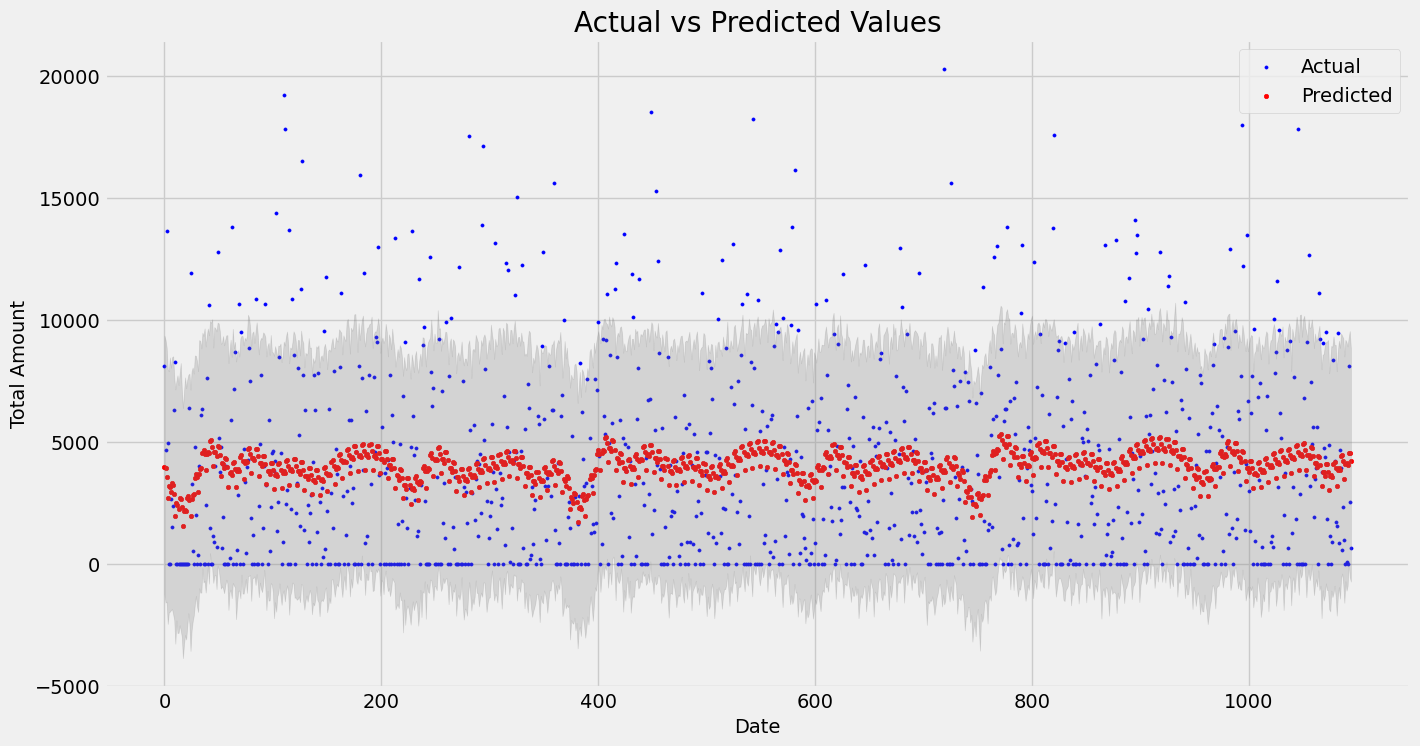

In [95]:

plt.figure(figsize=(15,8))

# Plot the actual data
plt.scatter(merged.index, merged['Total_Amt'], color='blue', label='Actual', s=5)

# Plot the predicted data
plt.scatter(merged.index, merged['yhat'], color='red', label='Predicted', s=10)
# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()



In [96]:
merged.to_csv('merged_test')

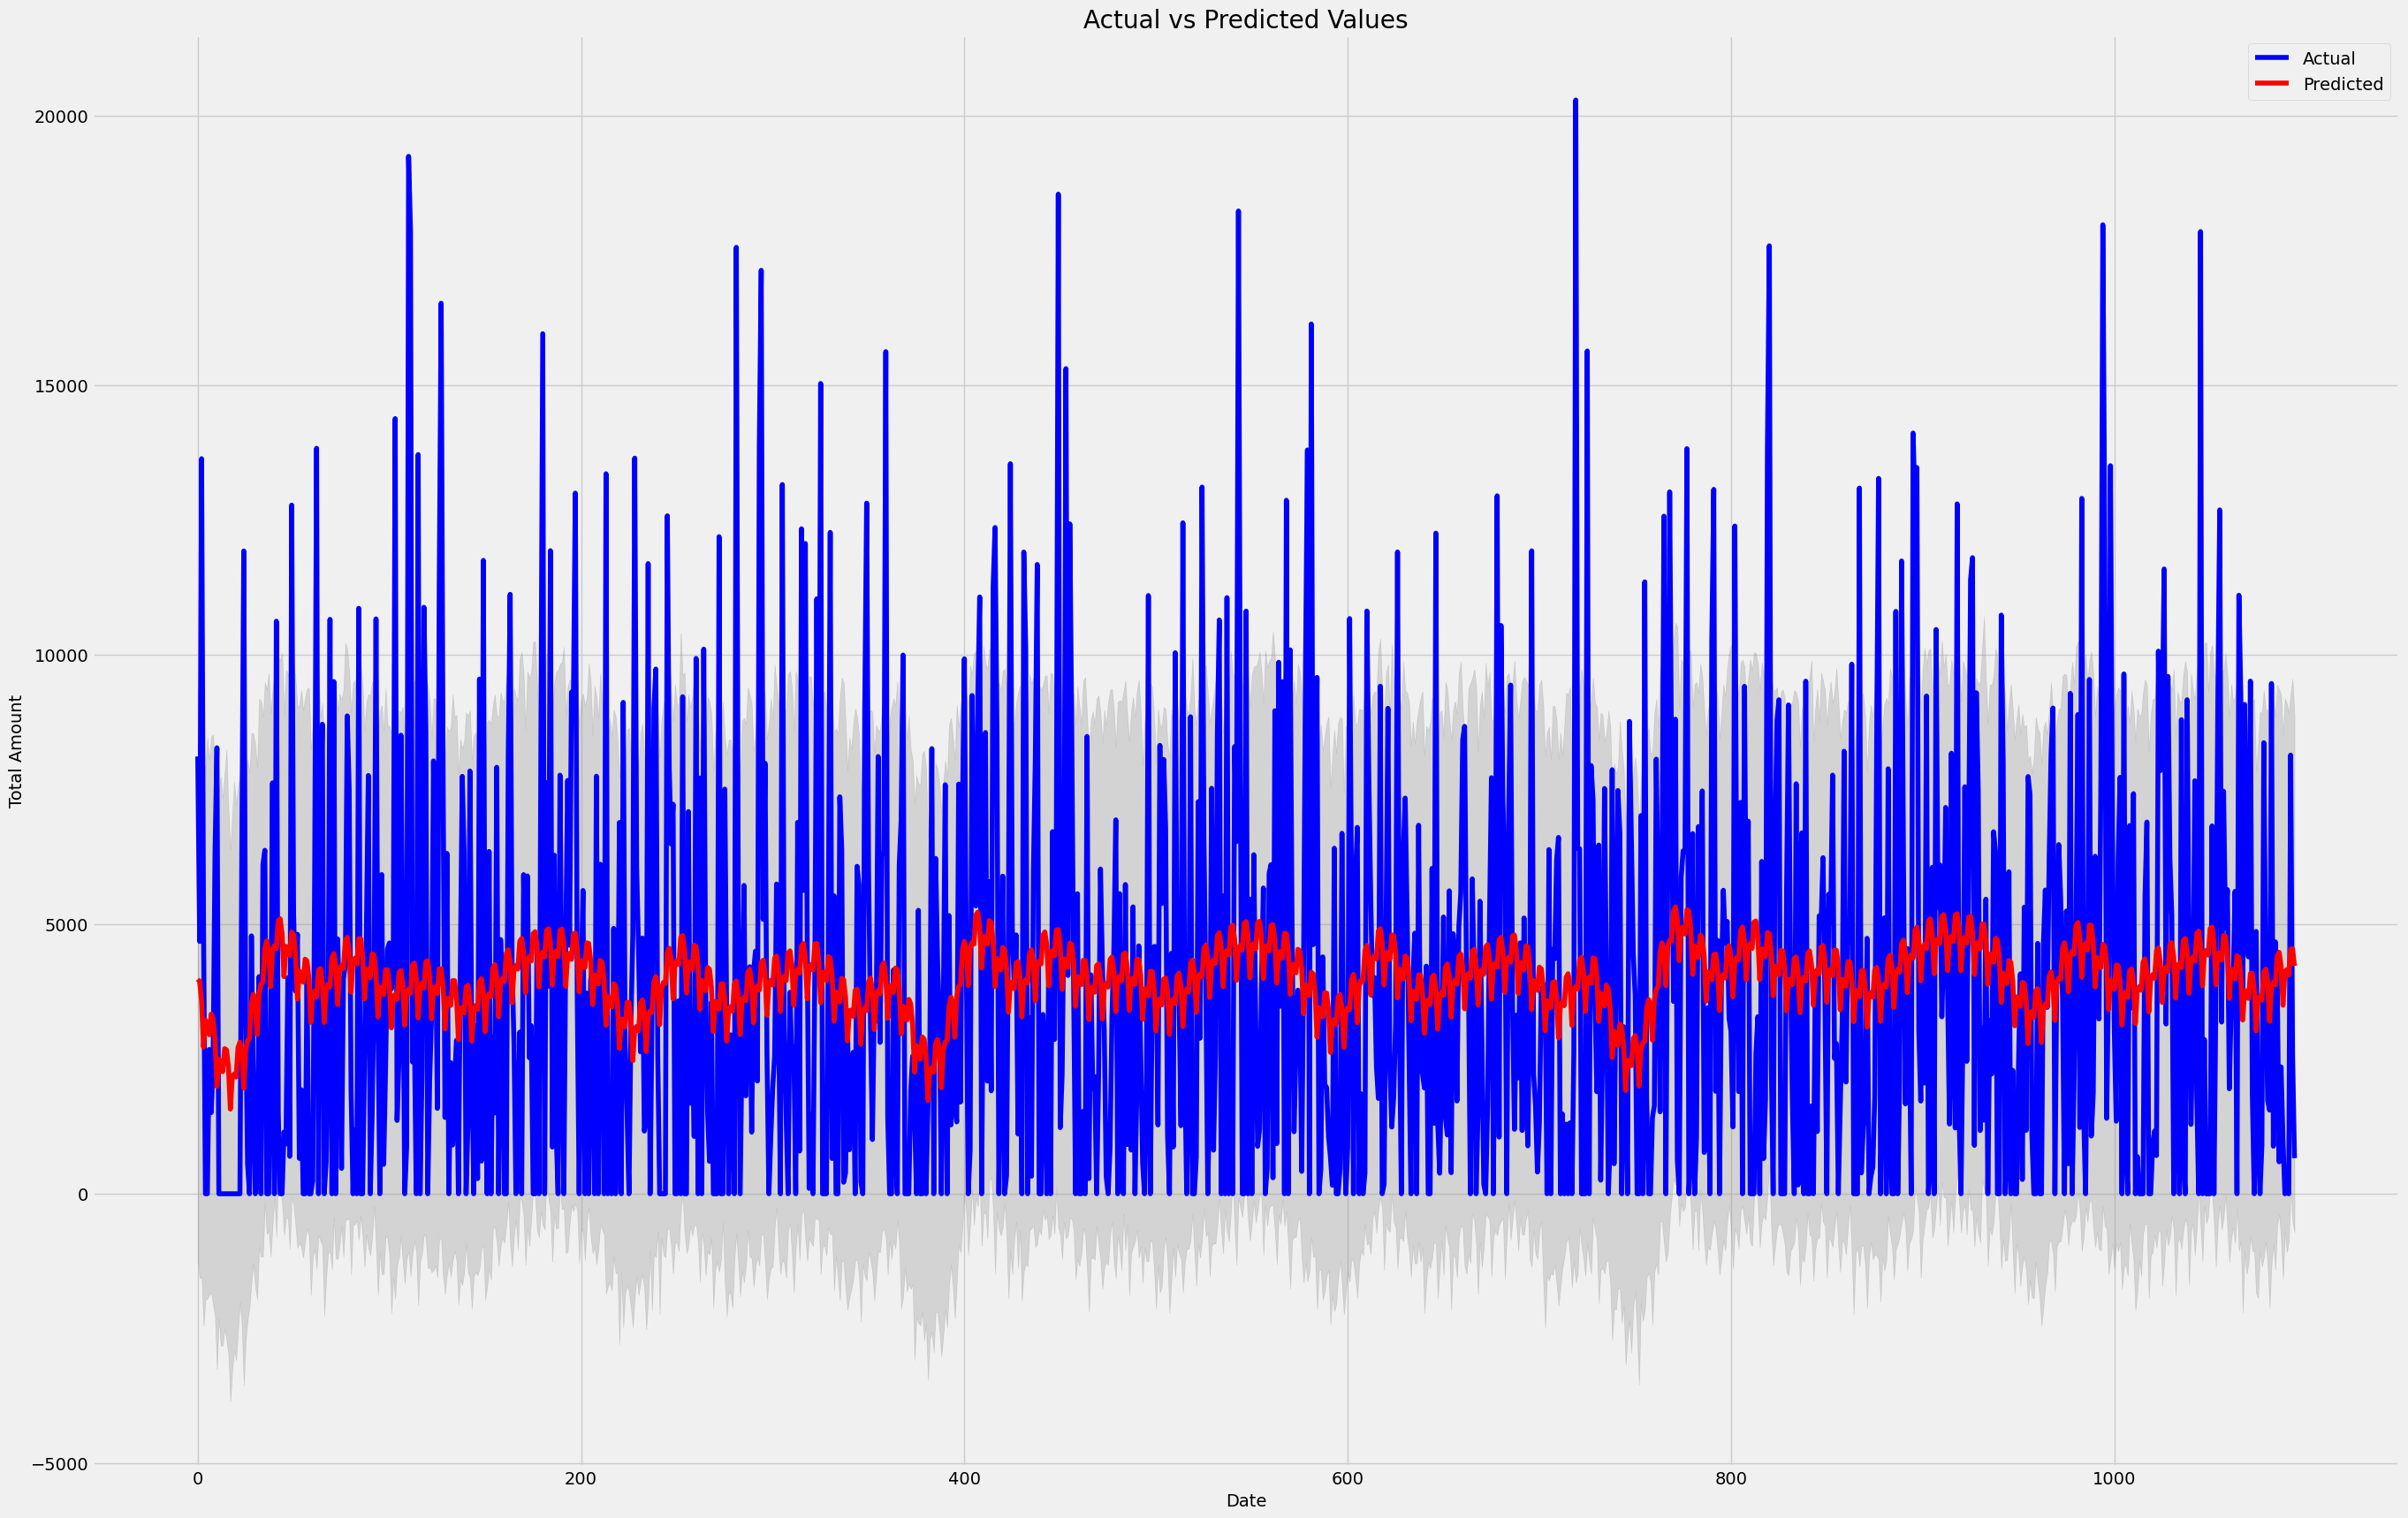

In [97]:
plt.figure(figsize=(30,20))

# plot the actual data
plt.plot(merged.index, merged['Total_Amt'], 'b-', label='Actual')

# plot the forecast 
plt.plot(merged.index, merged['yhat'], 'r-', label='Predicted')

# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')

plt.show()

#RMSE check
'''
the average difference between the actual and predicted daily total sales

'''

In [98]:
#to be safe let's make a copy of df "clean_data"
clean_data = df_daily.copy()

In [99]:
#rename Txn_date column to ds for merge
clean_data.rename(columns={'Txn_date': 'ds'}, inplace=True)

In [100]:
#converting df in forecast datase
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [101]:
merged_rmse = pd.merge(forecast, clean_data, on='ds', how='inner')

In [102]:
merged_rmse['diff_squared'] = (merged_rmse['yhat'] - merged_rmse['Total_Amt'])**2

In [103]:
mean_diff_squared = merged_rmse['diff_squared'].mean()

In [104]:
rmse = np.sqrt(mean_diff_squared)
rmse

3963.024095469102

In [105]:
# The difference between actual sales and prediction is almost $4000. I duno

#3. Forecasting summary

We have used the Facebook Prophet library to build our forecasting model. This model has been configured to account for daily seasonality. To advance our forecasting efforts, we have generated separate forecasts for each category.

Evaluation of the model: We have utilized the Root Mean Square Error (RMSE) to measure the accuracy of our forecasts.

Challenges: The current forecast does not provide a clear picture. The RMSE (which measures the difference between actual sales and predicted sales) for our forecast is approximately $4000, indicating a substantial discrepancy.

# Mean vs Forecast

In [106]:
# for comparison let's calculate daily mean of "Total_Amt" and "yhat" (our forecast) 



In [107]:
#upload the dataset
data_no_outliers = pd.read_csv('data_no_outliers.csv', parse_dates=['Txn_date'])

In [108]:
#Calculating daily mean for "Total_Amt"
daily_mean_data = data_no_outliers.groupby('Txn_date')["Total_Amt"].mean()
daily_mean_data

Txn_date
2016-01-02    2614.093696
2016-01-03    2725.942917
2016-01-04    3017.658913
2016-01-05    2746.628182
2016-01-06    2460.575000
                 ...     
2018-12-27    2560.285000
2018-12-28    2552.243056
2018-12-29    2503.500278
2018-12-30    2964.845000
2018-12-31    2416.512222
Name: Total_Amt, Length: 1071, dtype: float64

In [109]:
merged_mean_forecast = pd.merge(left=daily_mean_data.reset_index(), right=forecast[['ds', 'yhat']], left_on='Txn_date',right_on='ds')
merged_mean_forecast 

Txn_date    Total_Amt         ds         yhat
0    2016-01-02  2614.093696 2016-01-02  3978.532033
1    2016-01-03  2725.942917 2016-01-03  3936.350503
2    2016-01-04  3017.658913 2016-01-04  3577.595224
3    2016-01-05  2746.628182 2016-01-05  2721.403289
4    2016-01-06  2460.575000 2016-01-06  3220.739221
...         ...          ...        ...          ...
1066 2018-12-27  2560.285000 2018-12-27  4155.010112
1067 2018-12-28  2552.243056 2018-12-28  4059.866333
1068 2018-12-29  2503.500278 2018-12-29  4539.032496
1069 2018-12-30  2964.845000 2018-12-30  4541.754154
1070 2018-12-31  2416.512222 2018-12-31  4226.198626

[1071 rows x 4 columns]

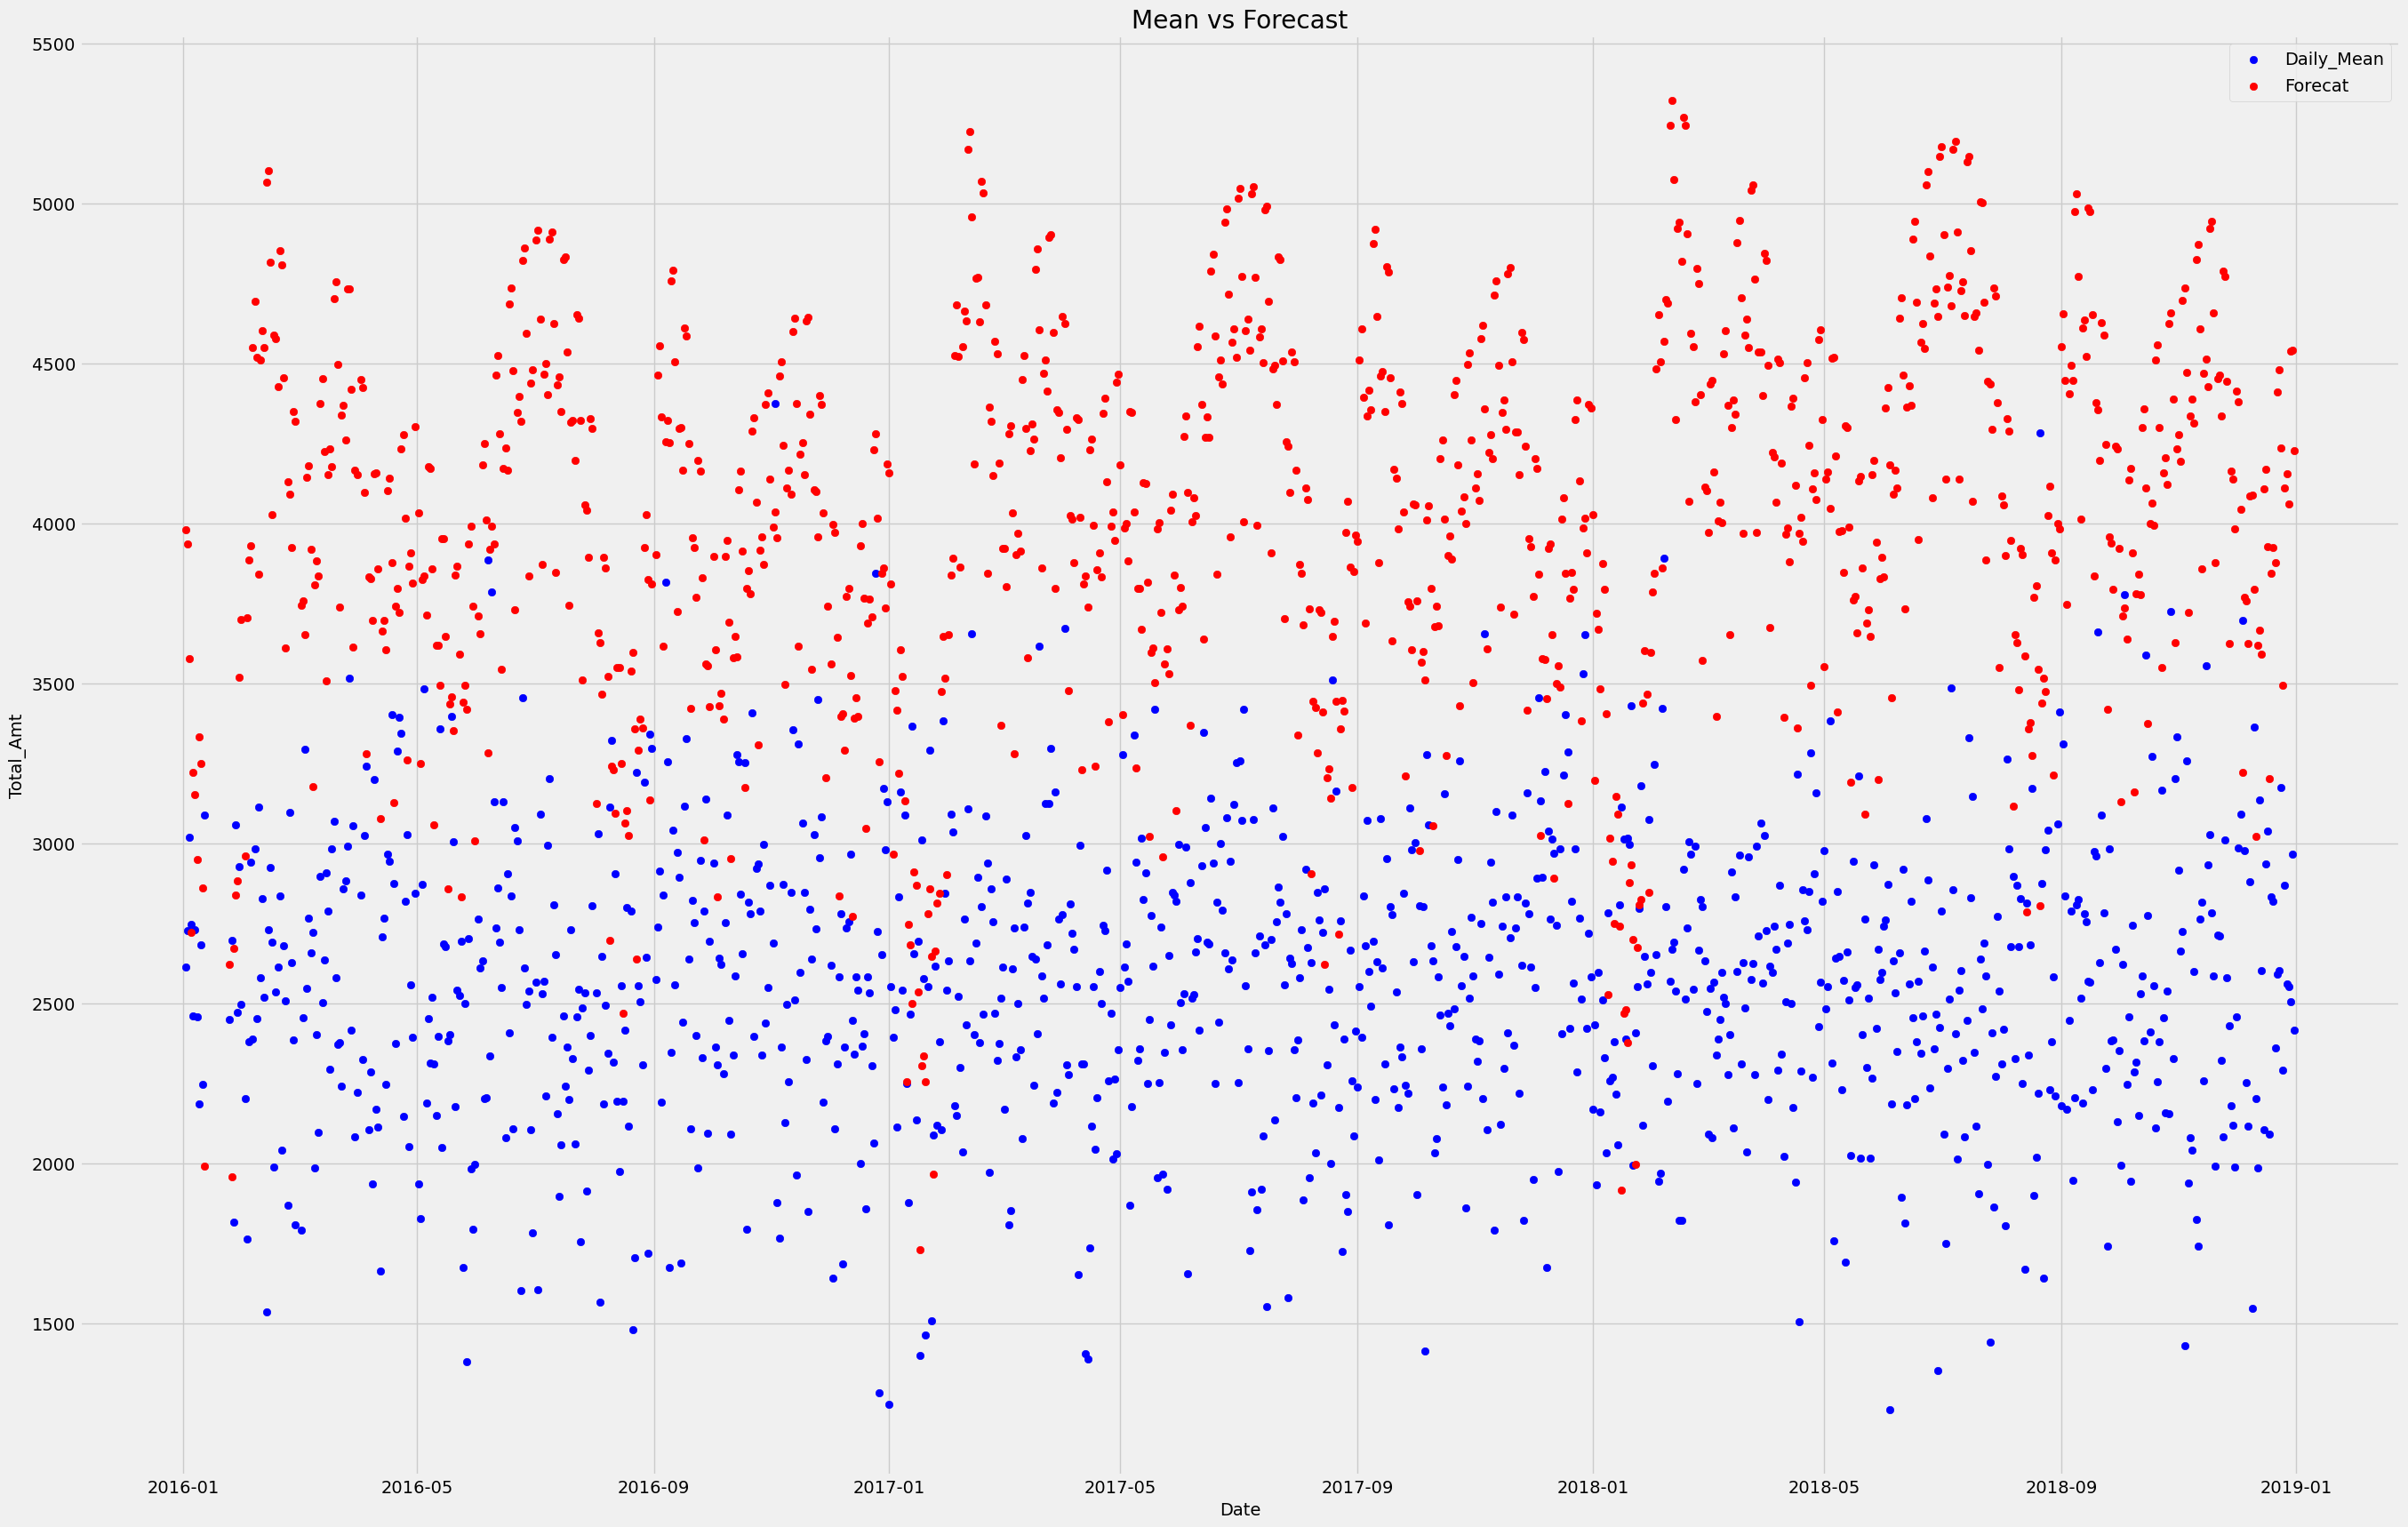

In [112]:
#Chart Scatter
plt.figure(figsize=(30, 20))
plt.scatter(merged_mean_forecast['Txn_date'], merged_mean_forecast['Total_Amt'], label='Daily_Mean', color='blue')
plt.scatter(merged_mean_forecast['Txn_date'], merged_mean_forecast['yhat'], label='Forecat', color='red')
plt.title("Mean vs Forecast")
plt.xlabel("Date")
plt.ylabel("Total_Amt")
plt.legend()
plt.grid(True)
plt.show()

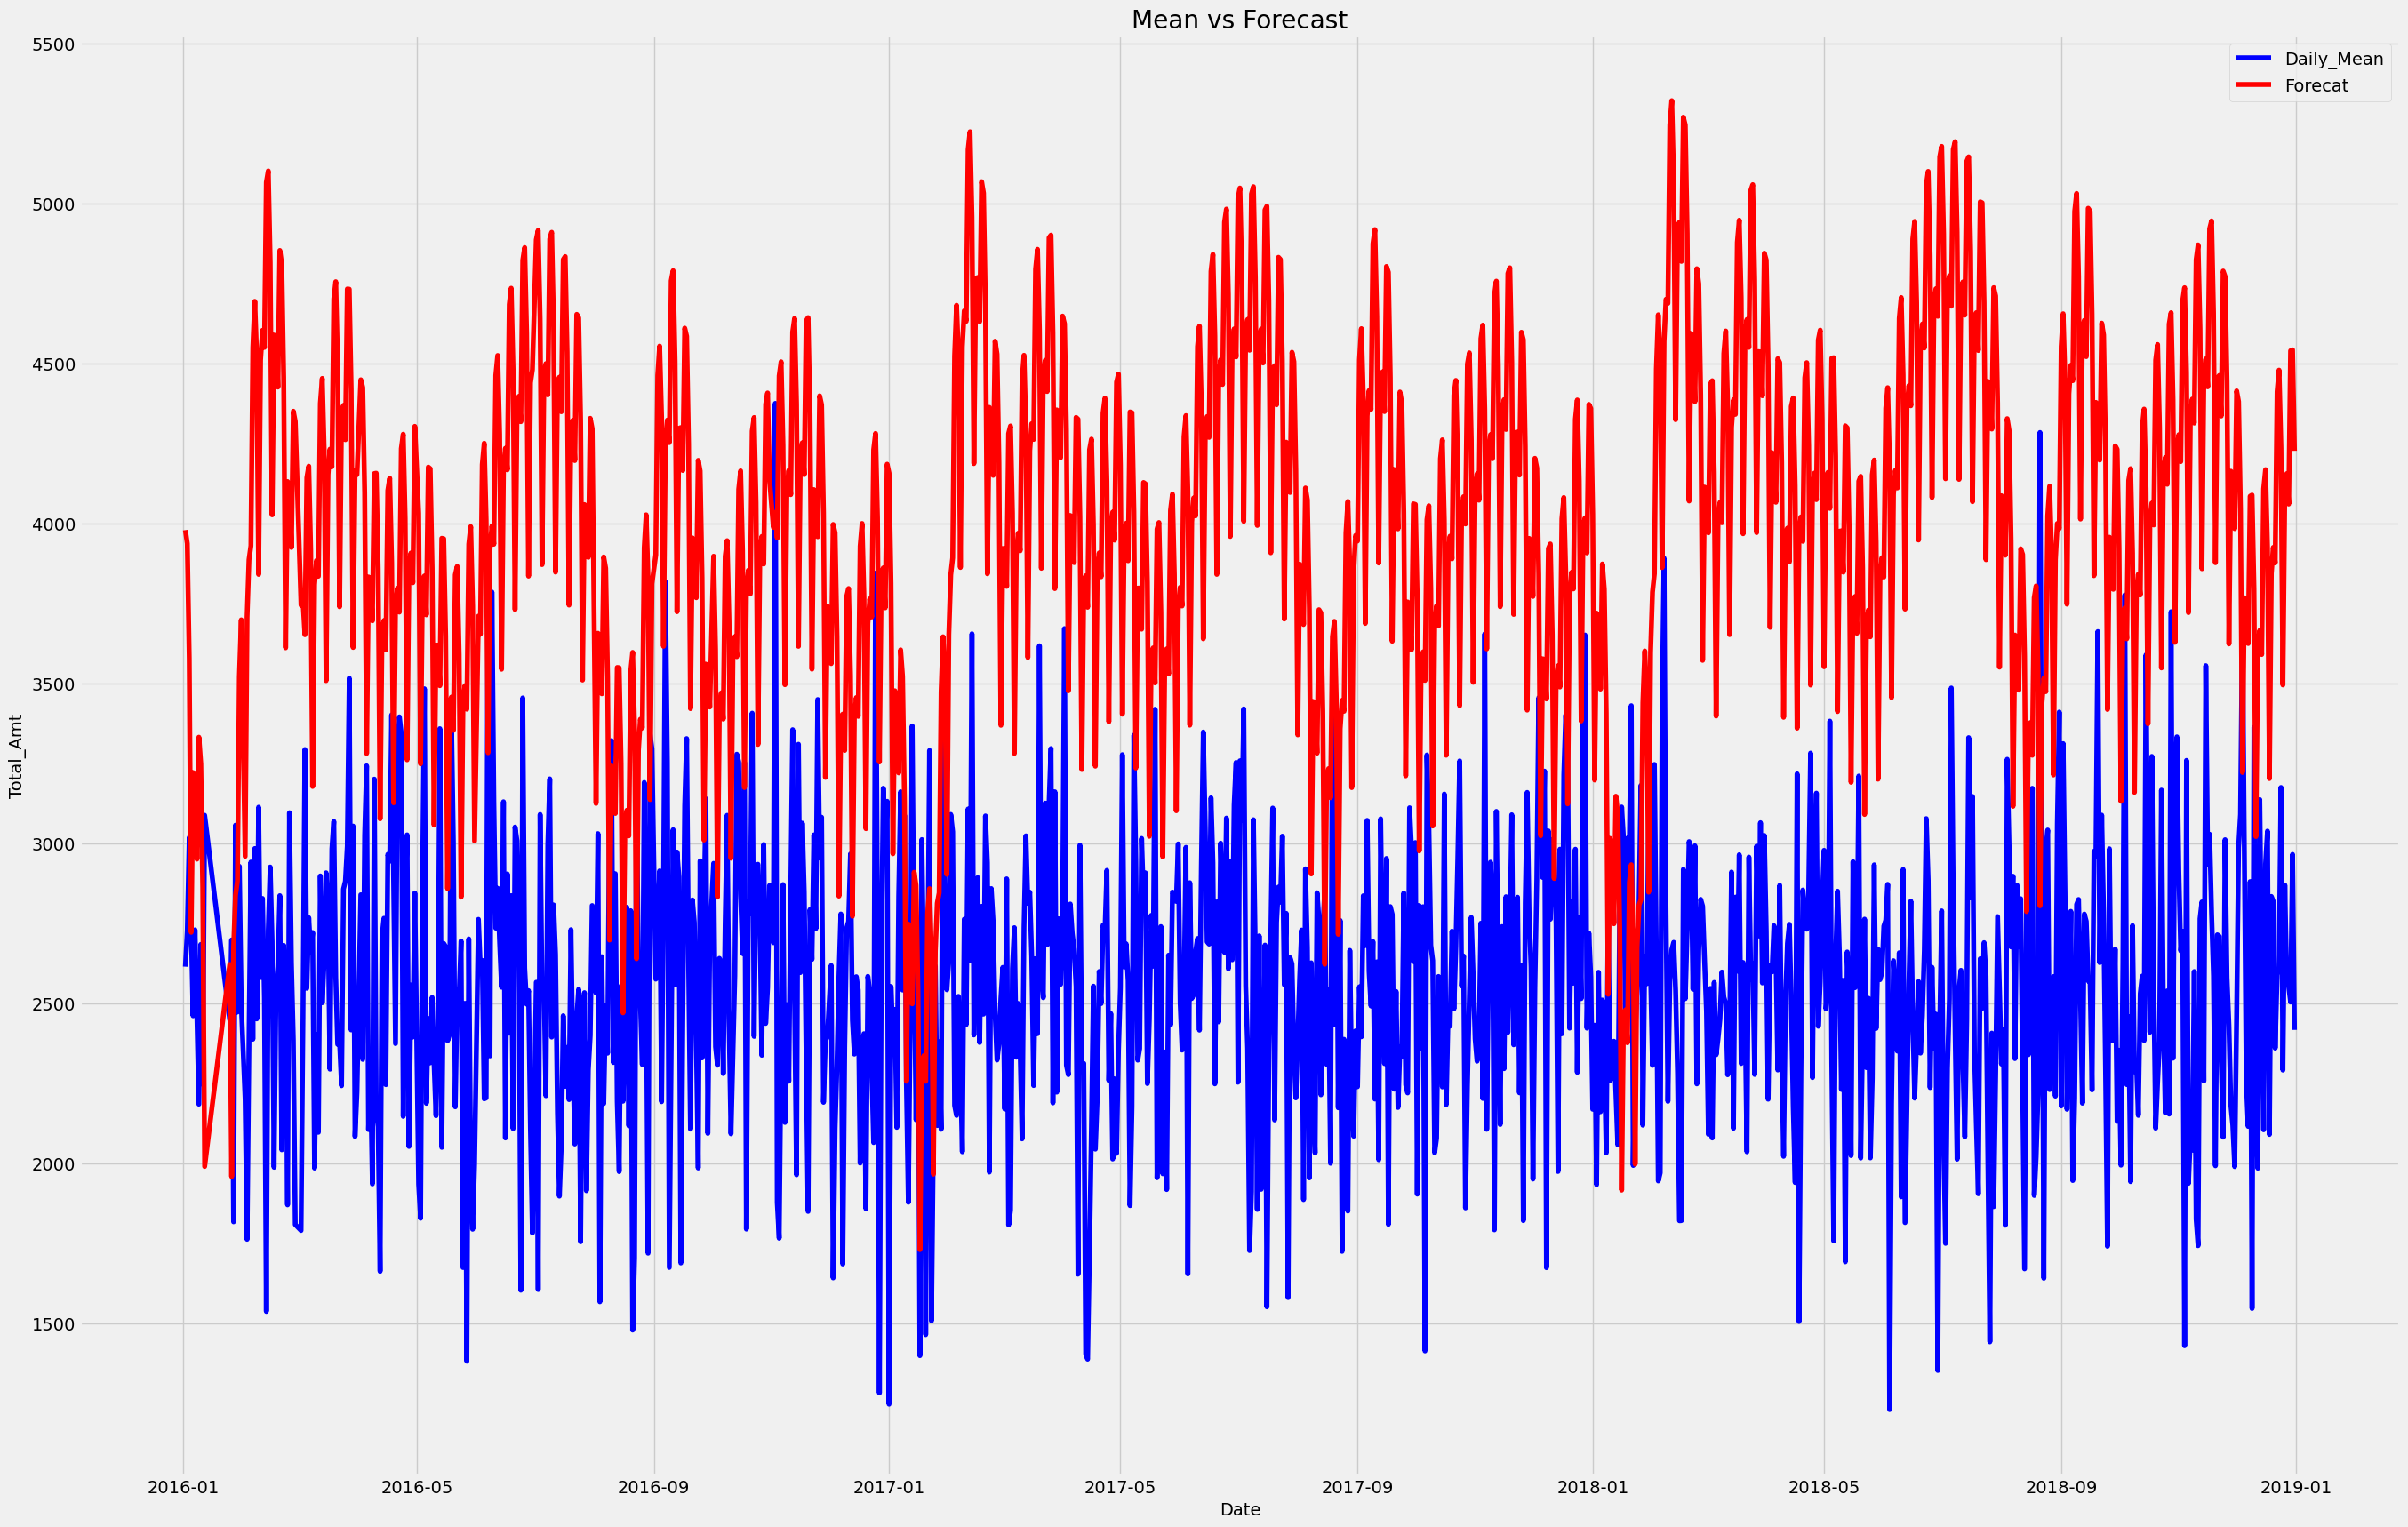

In [113]:
#Plot
plt.figure(figsize=(30, 20))
plt.plot(merged_mean_forecast['Txn_date'], merged_mean_forecast['Total_Amt'], label='Daily_Mean', color='blue')
plt.plot(merged_mean_forecast['Txn_date'], merged_mean_forecast['yhat'], label='Forecat', color='red')
plt.title("Mean vs Forecast")
plt.xlabel("Date")
plt.ylabel("Total_Amt")
plt.legend()
plt.grid(True)
plt.show()

# summary number_2
The forecast captures a general transaction trend. Also, most of the time the forecast values are not widly off-target. There is some consistency in the forecast which is telling us that model not heavily influenced by noise or big volatility of transactions. But, dispite building the forecast with seasonality we still facing pretty big volatility.